In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('household_power_consumption (Recovered).csv', low_memory=False)
fitbit = pd.read_csv('fitbit_new.csv', low_memory=False)
sleep = pd.read_csv('OneYearFitBitDataSleep.csv', low_memory=False)

In [3]:
fitbit.head(5)

,Data,CaloriesBurned,Steps,Distance,Piani,MinutesOfSedentaryActivity,MinutesOfLightActivity,MinutesOfModerateActivity,MinutesOfIntenseActivity,CalorieActivity
0,04-06-15,3.470,16.060,1193,11,724.000,239,38,70,1.939
1,08-06-15,3.267,13.926,1035,21,701.000,265,63,29,1.785
2,13-06-15,4.083,26.444,1965,22,549.000,429,56,56,2.818
3,14-06-15,2.789,12.335,916,35,1.245,88,10,93,1.209
4,15-06-15,3.234,14.137,105,11,642.000,305,8,51,1.756


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-06,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-06,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-06,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-06,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-06,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
sleep.head()

,Date,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,09-05-2015,384,26,23,417
1,10-05-2015,454,35,21,491
2,11-05-2015,387,46,25,436
3,12-05-2015,311,31,21,350
4,13-05-2015,407,65,44,491


In [6]:
fitbit.drop(fitbit.Piani,inplace=True)

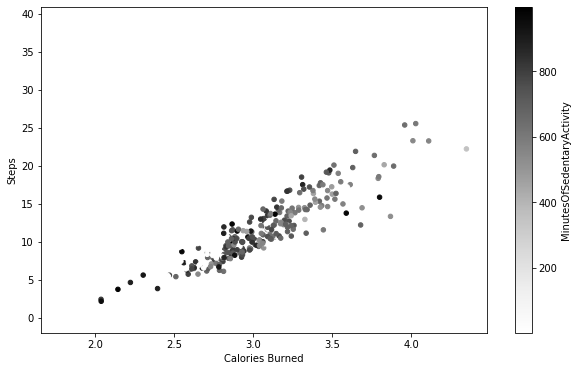

In [7]:
fig,ax = plt.subplots(figsize = (10,6))
fitbit.plot(kind = 'scatter',x='CaloriesBurned',y='Steps', c='MinutesOfSedentaryActivity',ax=ax)
ax.set_xlabel('Calories Burned');

In [8]:
SA=[]

for x in fitbit['MinutesOfSedentaryActivity']:
    if x>520:
        SA.append(1)
    else:
        SA.append(0)

fitbit['SedentaryAct']=SA

In [29]:
x = fitbit.drop(['SedentaryAct','Data'],axis=1)

In [30]:
y = fitbit.SedentaryAct

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [32]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [33]:
x.head()

,CaloriesBurned,Steps,Distance,Piani,MinutesOfSedentaryActivity,MinutesOfLightActivity,MinutesOfModerateActivity,MinutesOfIntenseActivity,CalorieActivity
27,3.259,12.168,904,18,731.000,212,52,60,1.725
29,3.569,14.996,1114,32,573.000,321,50,54,2.155
31,3.228,12.739,947,16,761.000,247,47,47,1.733
36,3.071,13.262,985,20,1.093,166,33,70,1.495
37,2.984,9.090,675,17,719.000,234,23,23,1.349


In [34]:
clf.fit(xtrain,ytrain)

D:\a\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
clf.score(xtrain,ytrain)

1.0

In [36]:
ypreds = clf.predict(xtest)
ypreds

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [37]:
clf.score(xtest,ytest)

0.9827586206896551

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypreds)

0.9827586206896551

In [39]:
xtrain.head()

,CaloriesBurned,Steps,Distance,Piani,MinutesOfSedentaryActivity,MinutesOfLightActivity,MinutesOfModerateActivity,MinutesOfIntenseActivity,CalorieActivity
188,2.636,7.378,548,12,838.0,176,33,12,1.044
170,2.835,10.740,808,11,1.1,146,39,52,1.271
245,2.927,7.995,598,15,802.0,231,34,16,1.347
146,3.336,11.151,829,1,705.0,198,40,79,1.799
241,2.816,8.353,621,19,732.0,219,17,26,1.187


In [40]:
clf.predict(np.array([[3.5,14,800,20,700,200,48,30,1.5]]))

array([1], dtype=int64)

In [41]:
clf.predict(np.array([[3.5,14,800,20,300,200,48,30,1.5]]))

array([0], dtype=int64)

In [42]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-06,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-06,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-06,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-06,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-06,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [43]:
a = [i for i in range(31)]
d = []
i=0
DF=df.loc[:43800]
while i in range(43800):
    try:
        df1 = DF['Global_active_power'].loc[i:i+1440].astype(float)
    except ValueError as e:
        print('Error ',e,' on line ',i )
    d.append(df1.mean())
    i = i+1440
#x = np.array(df['Global_active_power'].loc[:10].astype(float))
#np.mean(x)

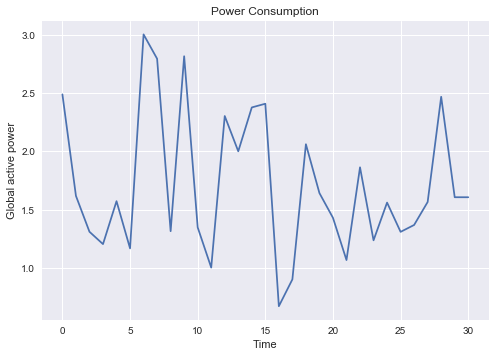

In [44]:
plt.style.use('seaborn')
x = df
fig, ax = plt.subplots()
ax.plot(a,d)
ax.set(title='Power Consumption',
      xlabel='Time',
      ylabel='Global active power');

In [25]:
fig.savefig('Power Consumption.jpg')